In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train_data = "titanic-dataset/titanic_train.csv"

In [3]:
df_train = pd.read_csv(train_data)

In [4]:
df_train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [7]:
df_train.shape

(850, 15)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [11]:
df_train.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


# Count values

In [8]:
df_train.survived.value_counts()

0    537
1    313
Name: survived, dtype: int64

In [9]:
df_train.survived.value_counts(normalize=True)

0    0.631765
1    0.368235
Name: survived, dtype: float64

# Sort Values

In [12]:
df_train.sort_values(by=['pclass', 'age'], ascending=True)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
759,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
289,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
829,94,1,"Dodge, Master. Washington",male,4.0000,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA",1
65,273,1,"Spedden, Master. Robert Douglas",male,6.0000,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY",1
375,54,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,993,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q,16,NaN,NaN,1
814,1095,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,NaN,NaN,NaN,0
820,1167,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q,NaN,NaN,NaN,0
821,1123,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,D,NaN,NaN,1


# Filter rows

In [21]:
df_train[(df_train['survived'] == 1) & (df_train['sex'] == 'female')].head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
11,43,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA",1


In [22]:
df_train[(df_train['survived'] == 1) & (df_train['sex'] == 'female')]['embarked'].value_counts()

S    122
C     64
Q     23
Name: embarked, dtype: int64

In [25]:
df_train[(df_train['survived'] == 1) & (df_train['sex'] == 'female')]['embarked'].value_counts(normalize=True)*100

S    58.373206
C    30.622010
Q    11.004785
Name: embarked, dtype: float64

# map values to column

[reference](https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans)

## using `replace`

In [26]:
sex_map = {"female": "f", "male": "m"}

In [35]:
df_train.replace({"sex": sex_map}) # inplace change, overwriting the original column

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,sex_map
0,1216,3,"Smyth, Miss. Julia",f,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,fxx
1,699,3,"Cacic, Mr. Luka",m,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,mxx
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",f,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,fxx
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",f,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,fxx
4,576,2,"Veal, Mr. James",m,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,mxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",m,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0,mxx
846,174,1,"Kent, Mr. Edward Austin",m,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0,mxx
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",f,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1,fxx
848,1112,3,"Peacock, Miss. Treasteall",f,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0,fxx


## using `map`

In [39]:
df_train['sex_map_2'] = df_train['sex'].map(sex_map)

## using `apply` and adding new column

this is more versatile. in `apply` you can pass the function name and that function can have complex logic 

In [40]:
def map_sex(s):
    if s == "female": 
        return "fxx"
    elif s == "male":
        return "mxx"
    else:
        return "unknown"

In [41]:
df_train['sex_map'] = df_train.sex.apply(map_sex) # creating new columns

In [42]:
df_train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,sex_map,sex_map_2
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,fxx,f
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,mxx,m
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,fxx,f
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,fxx,f
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,mxx,m


# Group-by values

## Sex: Female more likely to survive than male

In [43]:
df_train.groupby(['survived','sex'])['survived'].count()

survived  sex   
0         female     89
          male      448
1         female    210
          male      103
Name: survived, dtype: int64

In [46]:
# smart representation
pd.crosstab(df_train.survived, df_train.sex, margins=True)

sex,female,male,All
survived,,,
0,89,448,537
1,210,103,313
All,299,551,850


In [53]:
pd.crosstab(df_train.survived, df_train.sex, margins=True, normalize='all')*100

sex,female,male,All
survived,,,
0,10.470588,52.705882,63.176471
1,24.705882,12.117647,36.823529
All,35.176471,64.823529,100.000000


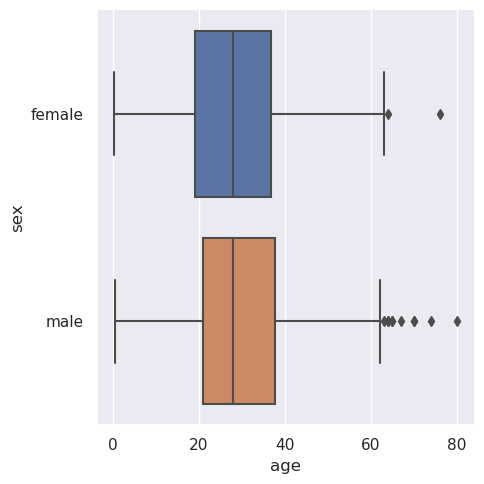

In [60]:
sns.catplot(data=df_train, x='age',y='sex',kind='box');

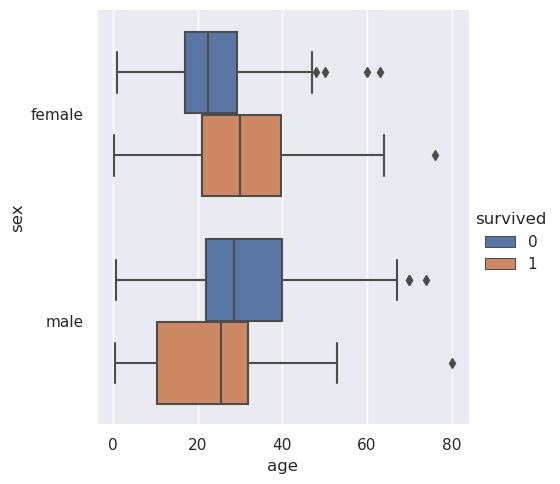

In [61]:
sns.catplot(data=df_train, x='age',y='sex', hue='survived', kind='box');

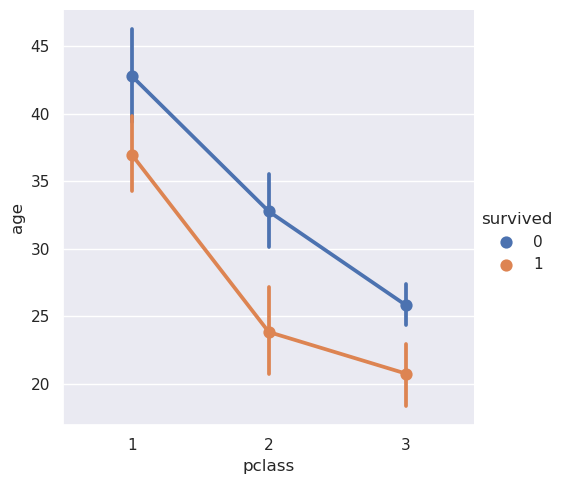

In [73]:
sns.catplot(data=df_train, y='age',x='pclass', hue='survived', kind='point');

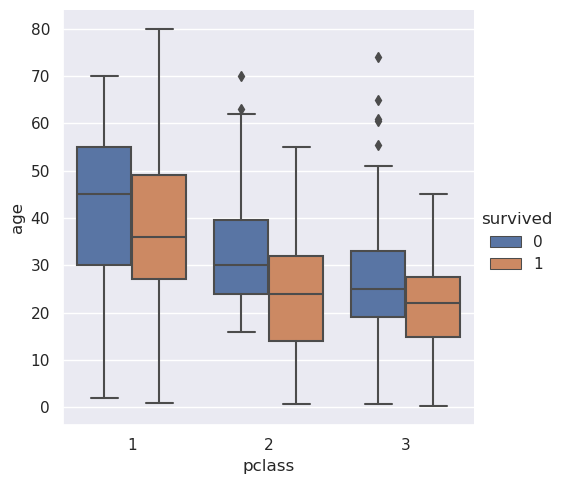

In [68]:
sns.catplot(data=df_train, y='age',x='pclass', hue='survived', kind='box');

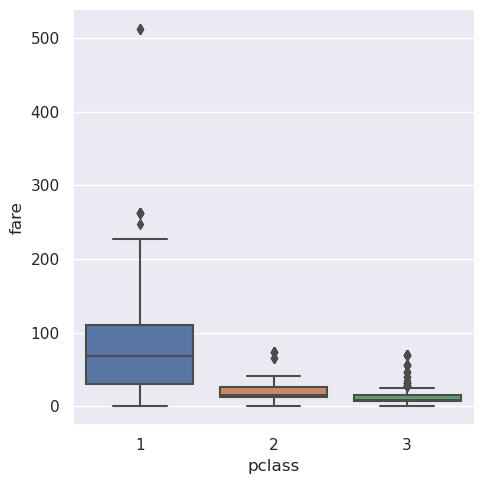

In [70]:
sns.catplot(data=df_train, y='fare',x='pclass', kind='box');

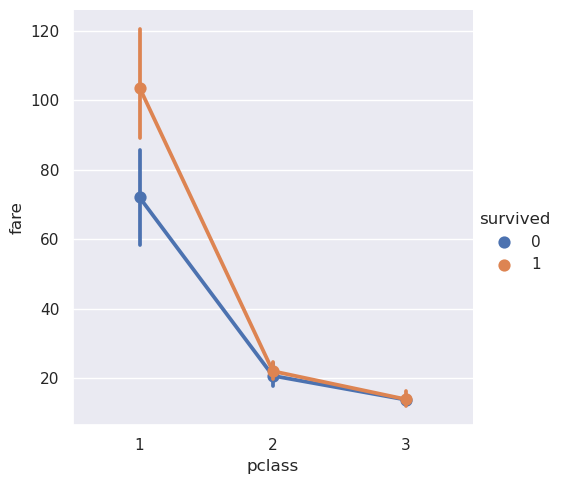

In [72]:
sns.catplot(data=df_train, y='fare',x='pclass', hue='survived', kind='point');